__INICIO e IMPORTACION DE train_set y test_set__
__dataset en : https://www.kaggle.com__

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [5]:
from keras.preprocessing import image
imagen = image.load_img("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/dogs/dog.35.jpg")


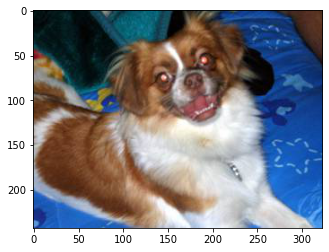

In [6]:
plt.imshow(imagen);

In [10]:
pets_train = next(os.walk("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/cats/"))[2]
len(pets_train)

4001

In [11]:
gatos_train = next(os.walk("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/"))[2]
len(gatos_train)

1012

__INICIO DE ARQUITECTURA CONVUNCIONAL__

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Inicializar keras
model = Sequential()

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [16]:
train_set.class_indices 

{'cats': 0, 'dogs': 1}

In [17]:
 train_set[0][0][0]

array([[[0.2916745 , 0.41716468, 0.6485372 ],
        [0.29165265, 0.41714287, 0.64851546],
        [0.29163083, 0.41712105, 0.6484936 ],
        ...,
        [0.6312253 , 0.63514686, 0.5802449 ],
        [0.63124704, 0.6351686 , 0.58026665],
        [0.63126886, 0.6351904 , 0.58028847]],

       [[0.3034142 , 0.42890438, 0.66027695],
        [0.30339235, 0.42888254, 0.66025513],
        [0.30337054, 0.42886072, 0.6602333 ],
        ...,
        [0.6199341 , 0.62385565, 0.5689537 ],
        [0.6198759 , 0.6237975 , 0.5688955 ],
        [0.6198177 , 0.62373924, 0.5688373 ]],

       [[0.31324938, 0.4406441 , 0.67154056],
        [0.31325668, 0.44062224, 0.67152596],
        [0.31326395, 0.44060043, 0.6715114 ],
        ...,
        [0.6507533 , 0.65473986, 0.5997405 ],
        [0.6508043 , 0.65477616, 0.59979874],
        [0.6508552 , 0.6548125 , 0.5998569 ]],

       ...,

       [[0.16872205, 0.26290277, 0.45113805],
        [0.1687657 , 0.26297548, 0.4512108 ],
        [0.16880932, 0

In [18]:
train_set[0][0][0].shape

(64, 64, 3)

In [19]:
# Capa de convolución
model.add(Conv2D(filters = 32, 
                 kernel_size = (3, 3), 
                 input_shape = (64, 64, 3), 
                 activation = 'relu'))

In [20]:
# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

__MODELO DE CLASIFICACION__

In [24]:
# Código completo:

# Librerias de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#------------------------------------------------------------------------------------------------------------------------
#Extraer pixels

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


#------------------------------------------------------------------------------------------------------------------------
# Inicializar keras
model = Sequential()

# Capa de convolución
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

# Segunda capa de convolución 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Max-Pooling segunda capa 
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flattering
model.add(Flatten())


#------------------------------------------------------------------------------------------------------------------------
#Red neuronal de toda la vida  
model.add(Dense(units = 128, activation = 'relu'))         #Capa oculta 
model.add(Dense(units = 1, activation = 'sigmoid'))        #Capa de salida 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    #compilación 

#------------------------------------------------------------------------------------------------------------------------

#Entrenar el modelo: 
model.fit_generator(train_set,
                         steps_per_epoch = 8000,       #Nº imagenes 
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
8000/8000 [==============================] - 56s 7ms/step - loss: 0.6554 - accuracy: 0.6051 - val_loss: 0.5973 - val_accuracy: 0.6920


In [25]:
#Guardar modelo 
model.save("gato_perro.h5")

In [26]:
# Cargar modelo
from keras.models import load_model
gato_perro = load_model("gato_perro.h5")

__PRUEBA CON GATO__ (nos debe salir resultado 0)

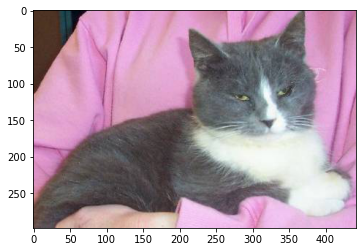

In [47]:
from keras.preprocessing import image

imagen = image.load_img('D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/cat.4867.jpg')

plt.imshow(imagen);

In [48]:
from keras.preprocessing import image

#Cargar imagen con formato 64x64
imagen = image.load_img('D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/cat.4867.jpg', target_size = (64, 64)) 

#Obtener pixels 
imagen = image.img_to_array(imagen)
imagen = np.expand_dims(imagen, axis = 0)

In [49]:
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)

resultado
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)

if(resultado==[1.]):
    print('PERRO')
else:
    if(resultado==[0.]):
        print('GATO')

GATO


__PRUEBA CON PERRO (nos debe salir resultado 1)__

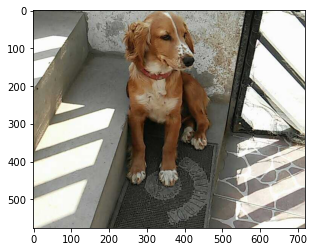

In [50]:
from keras.preprocessing import image

imagen = image.load_img('D:/MiniProyectos_Python/toffiAdulto.jpg')

plt.imshow(imagen);

In [51]:
from keras.preprocessing import image

#Cargar imagen con formato 64x64
imagen = image.load_img('D:/MiniProyectos_Python/toffiAdulto.jpg', target_size = (64, 64)) 

#Obtener pixels 
imagen = image.img_to_array(imagen)
imagen = np.expand_dims(imagen, axis = 0)

In [52]:
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)
resultado
if(resultado==[1.]):
    print('PERRO')
else:
    if(resultado==[0.]):
        print('GATO')

PERRO


__ESOOOOOOOO BBYY__ 

    aun faltan modificaciones en la orientacion de las imagenes